## Setup

In [1]:
import sys
!{sys.executable} -m pip install --upgrade -q tcia_utils

In [2]:

import requests
import pandas as pd
from tcia_utils import nbia
     

In [3]:
collection = "CPTAC-PDA"
api_url = ""

In [8]:
# count patients for each modality
data = nbia.getModalityCounts(collection)
print(data)

2024-05-25 17:25:33,965:INFO:Success - Token saved to api_call_headers variable and expires at 2024-05-25 19:25:33.965978
2024-05-25 17:25:33,966:INFO:Accessing Advanced API anonymously. To access restricted data use nbia.getToken() with your credentials.
2024-05-25 17:25:33,967:INFO:Calling... https://services.cancerimagingarchive.net/nbia-api/services/getModalityValuesAndCounts with parameters {'Collection': 'CPTAC-PDA'}


[{'criteria': 'CT', 'count': '98'}, {'criteria': 'MR', 'count': '17'}, {'criteria': 'PT', 'count': '2'}, {'criteria': 'RTSTRUCT', 'count': '103'}, {'criteria': 'US', 'count': '2'}]


In [9]:
df = nbia.getPatient(collection, format = "df", api_url = api_url)

display(df)

2024-05-25 17:25:34,759:INFO:Calling... https://services.cancerimagingarchive.net/nbia-api/services/v1/getPatient with parameters {'Collection': 'CPTAC-PDA'}


,PatientId,PatientName,PatientSex,Collection,Phantom,SpeciesCode,SpeciesDescription,EthnicGroup
0,C3N-00302,C3N-00302,M,CPTAC-PDA,NO,337915000,Homo sapiens,NaN
1,C3N-00249,C3N-00249,M,CPTAC-PDA,NO,337915000,Homo sapiens,8
2,C3N-01502,C3N-01502,O,CPTAC-PDA,NO,337915000,Homo sapiens,NaN
3,C3N-00198,C3N-00198,M,CPTAC-PDA,NO,337915000,Homo sapiens,8
4,C3L-00401,C3L-00401,F,CPTAC-PDA,NO,337915000,Homo sapiens,NaN
...,...,...,...,...,...,...,...,...
103,C3L-05746,C3L-05746,M,CPTAC-PDA,NO,337915000,Homo sapiens,NaN
104,C3L-05049,C3L-05049,M,CPTAC-PDA,NO,337915000,Homo sapiens,NaN
105,C3L-04853,C3L-04853,F,CPTAC-PDA,NO,337915000,Homo sapiens,NaN
106,C3L-03622,C3L-03622,F,CPTAC-PDA,NO,337915000,Homo sapiens,NaN


In [10]:
# obtain study/visit details (e.g. anonymized study date, age at the time of visit)
df = nbia.getStudy(collection, format = "csv", api_url = api_url)
display(df)

2024-05-25 17:25:40,438:INFO:Calling... https://services.cancerimagingarchive.net/nbia-api/services/v1/getPatientStudy with parameters {'Collection': 'CPTAC-PDA'}
2024-05-25 17:25:51,422:INFO:CSV saved to: getPatientStudy_2024-05-25_17-25.csv


,StudyInstanceUID,StudyDate,StudyDescription,PatientAge,PatientID,PatientName,PatientSex,Collection,SeriesCount,LongitudinalTemporalEventType,LongitudinalTemporalOffsetFromEvent,EthnicGroup,AdmittingDiagnosesDescription
0,1.3.6.1.4.1.14519.5.2.1.3320.3273.253612125559...,1999-10-19 00:00:00.0,STANDARD Abdomen,058Y,C3N-00302,C3N-00302,M,CPTAC-PDA,33,DIAGNOSIS,-24.0,NaN,NaN
1,1.3.6.1.4.1.14519.5.2.1.3320.3273.187887287595...,1999-10-19 00:00:00.0,Abdomen^KLP_JB_M (Adult),058Y,C3N-00302,C3N-00302,M,CPTAC-PDA,7,DIAGNOSIS,-24.0,NaN,NaN
2,1.3.6.1.4.1.14519.5.2.1.7085.2626.724767261929...,2009-11-09 00:00:00.0,CT GUIDED BIOPSY:PANCREAS,071Y,C3N-00249,C3N-00249,M,CPTAC-PDA,8,DIAGNOSIS,-19.0,8,NaN
3,1.3.6.1.4.1.14519.5.2.1.7085.2626.300036405768...,2009-11-22 00:00:00.0,CT CHEST W IV CONTRAST,071Y,C3N-00249,C3N-00249,M,CPTAC-PDA,7,DIAGNOSIS,-6.0,8,NaN
4,1.3.6.1.4.1.14519.5.2.1.7085.3273.239188356780...,2010-04-01 00:00:00.0,NaN,NaN,C3N-01502,C3N-01502,O,CPTAC-PDA,8,DIAGNOSIS,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1.3.6.1.4.1.14519.5.2.1.1078.3273.161967304009...,2004-08-17 00:00:00.0,CT ABDOMEN + PELVIS AUGMENTED=AB,072Y,C3L-03622,C3L-03622,F,CPTAC-PDA,7,NaN,NaN,NaN,NaN
128,1.3.6.1.4.1.14519.5.2.1.1078.3707.161967304009...,2004-08-17 00:00:00.0,CT ABDOMEN + PELVIS AUGMENTED=AB,072Y,C3L-03622,C3L-03622,F,CPTAC-PDA,1,NaN,NaN,NaN,NaN
129,1.3.6.1.4.1.14519.5.2.1.3320.3273.233099217658...,2000-06-21 00:00:00.0,88.011 TK jamy brzuszn,NaN,C3N-01898,C3N-01898,F,CPTAC-PDA,3,NaN,NaN,NaN,NaN
130,1.3.6.1.4.1.14519.5.2.1.3320.3273.116078088248...,2000-07-04 00:00:00.0,PET-CT WATROBA,NaN,C3N-01898,C3N-01898,F,CPTAC-PDA,5,NaN,NaN,NaN,NaN


In [12]:

# obtain scan/series metadata and save to variable for use in next example
data = nbia.getSeries(collection, api_url = api_url, format = "df")

display(data)
     

2024-05-25 17:28:03,945:INFO:Calling... https://services.cancerimagingarchive.net/nbia-api/services/v1/getSeries with parameters {'Collection': 'CPTAC-PDA'}


,SeriesInstanceUID,StudyInstanceUID,Modality,ProtocolName,SeriesDate,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,PatientID,Manufacturer,ManufacturerModelName,SoftwareVersions,ImageCount,TimeStamp,LicenseName,LicenseURI,CollectionURI,FileSize
0,1.3.6.1.4.1.14519.5.2.1.3320.3273.942174768826...,1.3.6.1.4.1.14519.5.2.1.3320.3273.253612125559...,MR,t2_space_cor_MRCP,1999-10-19 00:00:00.0,<MIP Range>,ABDOMEN,26,CPTAC-PDA,C3N-00302,SIEMENS,Skyra,syngo MR E11,19,2017-12-20 16:14:42.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2018.SC20FO18,15278008
1,1.3.6.1.4.1.14519.5.2.1.3320.3273.224140708780...,1.3.6.1.4.1.14519.5.2.1.3320.3273.253612125559...,MR,t1_fl2d_cor_p2_mbh,1999-10-19 00:00:00.0,t1_fl2d_cor_p2_mbh,ABDOMEN,14,CPTAC-PDA,C3N-00302,SIEMENS,Skyra,syngo MR E11,40,2017-12-20 16:14:50.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2018.SC20FO18,5393064
2,1.3.6.1.4.1.14519.5.2.1.3320.3273.300043802685...,1.3.6.1.4.1.14519.5.2.1.3320.3273.253612125559...,MR,t1_fl2d_tra_p2_mbh_CM,1999-10-19 00:00:00.0,t1_fl2d_tra_p2_mbh_CM,ABDOMEN,23,CPTAC-PDA,C3N-00302,SIEMENS,Skyra,syngo MR E11,45,2017-12-20 16:15:02.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2018.SC20FO18,8234894
3,1.3.6.1.4.1.14519.5.2.1.3320.3273.128743743642...,1.3.6.1.4.1.14519.5.2.1.3320.3273.253612125559...,MR,t1_vibe_fs_tra_p4_bh_320--cm,1999-10-19 00:00:00.0,t1_vibe_fs_tra_p4_bh_320--cm,ABDOMEN,22,CPTAC-PDA,C3N-00302,SIEMENS,Skyra,syngo MR E11,88,2017-12-20 16:15:18.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2018.SC20FO18,14977424
4,1.3.6.1.4.1.14519.5.2.1.3320.3273.126732908005...,1.3.6.1.4.1.14519.5.2.1.3320.3273.253612125559...,MR,t2_space_cor_MRCP,1999-10-19 00:00:00.0,t2_space_cor_MRCP,ABDOMEN,17,CPTAC-PDA,C3N-00302,SIEMENS,Skyra,syngo MR E11,88,2017-12-20 16:15:33.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2018.SC20FO18,62510878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,1.3.6.1.4.1.14519.5.2.1.3320.3273.298647437056...,1.3.6.1.4.1.14519.5.2.1.3320.3273.233099217658...,CT,6.1 JAMA BRZUSZNA,2000-06-21 00:00:00.0,NaN,NaN,3,CPTAC-PDA,C3N-01898,NaN,Optima CT660,cj2_5m3sp5.5,28,2023-08-02 08:47:02.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2018.SC20FO18,14811274
1650,1.3.6.1.4.1.14519.5.2.1.3320.3273.173093325143...,1.3.6.1.4.1.14519.5.2.1.3320.3273.116078088248...,PT,6.1 WB,2000-07-04 00:00:00.0,Q.Clear,NaN,14,CPTAC-PDA,C3N-01898,NaN,Discovery 710,53.00,83,2023-08-02 08:47:11.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2018.SC20FO18,11420820
1651,1.3.6.1.4.1.14519.5.2.1.3320.3273.109557454557...,1.3.6.1.4.1.14519.5.2.1.3320.3273.233099217658...,CT,6.1 JAMA BRZUSZNA,2000-06-21 00:00:00.0,Scout,NaN,1,CPTAC-PDA,C3N-01898,NaN,Optima CT660,cj2_5m3sp5.5,2,2023-08-02 08:45:28.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2018.SC20FO18,3656672
1652,1.3.6.1.4.1.14519.5.2.1.3320.3273.103864141863...,1.3.6.1.4.1.14519.5.2.1.3320.3273.465923680632...,CT,6.1 WB,2000-07-04 00:00:00.0,SCOUT,NaN,1,CPTAC-PDA,C3N-01898,NaN,Discovery 710,pet_coreload.44,1,2023-08-02 08:45:22.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2018.SC20FO18,3749836


In [13]:
# Calculate summary statistics for a given collection
nbia.reportDoiSummary(data, api_url = api_url, input_type = "df")

2024-05-25 17:28:56,021:INFO:Calling... https://api.datacite.org/dois/ with parameters {'provider-id': 'tciar', 'page[size]': 1000}


,Identifier,CollectionURI,Collections,Licenses,Subjects,Studies,Series,Images,File Size,Disk Space,Body Parts,Modalities,Manufacturers,Min TimeStamp,Max TimeStamp,UniqueTimeStamps
0,CPTAC-PDA-Tumor-Annotations,https://doi.org/10.7937/bw9v-bx61,CPTAC-PDA,Creative Commons Attribution 4.0 International...,103,119,534,534,14438550,14.44 MB,"ABDOMEN, Not Specified, CHEST, NECKCHESTABDPEL...",RTSTRUCT,Open Health Imaging Foundation,2023-07-03 14:52:14.0,2023-07-03 14:54:44.0,2023-07-03
1,CPTAC-PDA,https://doi.org/10.7937/k9/tcia.2018.sc20fo18,CPTAC-PDA,Creative Commons Attribution 3.0 Unported License,108,132,1120,130628,66047244552,66.05 GB,"ABDOMEN, CHEST, PANCREAS, Not Specified, J brz...","MR, CT, PT, US","SIEMENS, Siemens, GE MEDICAL SYSTEMS, TOSHIBA,...",2017-12-20 01:24:43.0,2023-08-02 08:47:12.0,"2017-12-20, 2018-04-18, 2018-04-20, 2018-06-21..."


## Download Dataset with annotations 

In [14]:
metadata_urls = {
    "CPTAC-CCRCC": "https://www.cancerimagingarchive.net/wp-content/uploads/Metadata_Report_CPTAC-CCRCC_2023_07_14.csv",
    "CPTAC-PDA": "https://www.cancerimagingarchive.net/wp-content/uploads/Metadata_Report_CPTAC-PDA_2023_07_14.csv",
    "CPTAC-HNSCC": "https://www.cancerimagingarchive.net/wp-content/uploads/Metadata_Report_CPTAC-HNSCC_2023_07_14.csv",
    "CPTAC-UCEC": "https://www.cancerimagingarchive.net/wp-content/uploads/Metadata_Report_CPTAC-UCEC_2023_07_14.csv"
}

if collection in metadata_urls:
    spreadsheet_url = metadata_urls[collection]
    annotation_Metadata = pd.read_csv(spreadsheet_url)
    display(annotation_Metadata)
else:
    print("URL for collection not found.")

,PatientID,ClinicalTrialTimePointID,SeriesInstanceUID,SeriesDescription,StudyDescription,StudyInstanceUID,StudyDate,ROIVolume,DICOM Type,StructureSetLabel,Annotation Type,ReferencedSeriesInstanceUID
0,C3N-01907,Pre-dose,1.2.826.0.1.534147.667.2747872357.202342312254...,"Pre-dose, PANCREAS - 1 - V2",TK jamy brzusznej z kontrastem,1.3.6.1.4.1.14519.5.2.1.3320.3273.362178438870...,6/29/2000,10.882575 cc,RTSS,PANCREAS - 1 - V,Segmentation,1.3.6.1.4.1.14519.5.2.1.3320.3273.164182346769...
1,C3N-01907,Pre-dose,1.2.826.0.1.534147.667.2747872357.202342312255...,"Pre-dose, PANCREAS - 1 - V2 - SEED POINT",TK jamy brzusznej z kontrastem,1.3.6.1.4.1.14519.5.2.1.3320.3273.362178438870...,6/29/2000,,RTSS,PANCREAS - 1 - V,Seed point,1.3.6.1.4.1.14519.5.2.1.3320.3273.164182346769...
2,C3N-01907,Post-cancer monitoring-1,1.2.826.0.1.534147.667.2747872357.202342312334...,"Post-cancer monitoring-1, PANCREAS - 1 - V1",MR jamy brzusznej,1.3.6.1.4.1.14519.5.2.1.3320.3273.321956066875...,8/3/2000,2.292759 cc,RTSS,PANCREAS - 1 - V,Segmentation,1.3.6.1.4.1.14519.5.2.1.3320.3273.101381320322...
3,C3N-01907,Post-cancer monitoring-1,1.2.826.0.1.534147.667.2747872357.202342312335...,"Post-cancer monitoring-1, PANCREAS - 1 - V1 -...",MR jamy brzusznej,1.3.6.1.4.1.14519.5.2.1.3320.3273.321956066875...,8/3/2000,NaN,RTSS,PANCREAS - 1 - V,Seed point,1.3.6.1.4.1.14519.5.2.1.3320.3273.101381320322...
4,C3N-01907,Post-cancer monitoring-1,1.2.826.0.1.534147.667.2747872357.202342312343...,"Post-cancer monitoring-1, PANCREAS - 1 - V1",MR jamy brzusznej,1.3.6.1.4.1.14519.5.2.1.3320.3273.321956066875...,8/3/2000,2.340134 cc,RTSS,PANCREAS - 1 - V,Segmentation,1.3.6.1.4.1.14519.5.2.1.3320.3273.631829865181...
...,...,...,...,...,...,...,...,...,...,...,...,...
529,C3N-00512,Pre-dose,1.2.826.0.1.534147.667.2747872357.202342725443...,"Pre-dose, RETROPERITONEAL LYMPH NODE - 1",TOMOGRAFIA JAMY BRZUSZNEJ Z KONTRASTEM,1.3.6.1.4.1.14519.5.2.1.3320.3273.880111599482...,1/12/2000,2.636492 cc,RTSS,RETROPERITONEAL,Segmentation,1.3.6.1.4.1.14519.5.2.1.3320.3273.252149503614...
530,C3N-00512,Pre-dose,1.2.826.0.1.534147.667.2747872357.202342725547...,"Pre-dose, RETROPERITONEAL LYMPH NODE - 1 - SE...",TOMOGRAFIA JAMY BRZUSZNEJ Z KONTRASTEM,1.3.6.1.4.1.14519.5.2.1.3320.3273.880111599482...,1/12/2000,NaN,RTSS,RETROPERITONEAL,Seed point,1.3.6.1.4.1.14519.5.2.1.3320.3273.252149503614...
531,C3N-00512,Pre-dose,1.2.826.0.1.534147.667.2747872357.202342725522...,"Pre-dose, RETROPERITONEAL LYMPH NODE -2",TOMOGRAFIA JAMY BRZUSZNEJ Z KONTRASTEM,1.3.6.1.4.1.14519.5.2.1.3320.3273.880111599482...,1/12/2000,2.952947 cc,RTSS,RETROPERITONEAL,Segmentation,1.3.6.1.4.1.14519.5.2.1.3320.3273.252149503614...
532,C3N-00512,Pre-dose,1.2.826.0.1.534147.667.2747872357.202342725533...,"Pre-dose, RETROPERITONEAL LYMPH NODE - 2 - SE...",TOMOGRAFIA JAMY BRZUSZNEJ Z KONTRASTEM,1.3.6.1.4.1.14519.5.2.1.3320.3273.880111599482...,1/12/2000,NaN,RTSS,RETROPERITONEAL,Seed point,1.3.6.1.4.1.14519.5.2.1.3320.3273.252149503614...


In [15]:
segSeries = annotation_Metadata.loc[annotation_Metadata['Annotation Type'] == 'Segmentation', 'SeriesInstanceUID'].iloc[0]

print(segSeries)

1.2.826.0.1.534147.667.2747872357.2023423122542681.4


In [16]:
# Find the row where 'SeriesInstanceUID' is equal to segSeries
filtered_row = annotation_Metadata[annotation_Metadata['SeriesInstanceUID'] == segSeries]

# Extract the value from 'ReferencedSeriesInstanceUID' column in the filtered row
refSeries = filtered_row['ReferencedSeriesInstanceUID'].iloc[0]

print(refSeries)

1.3.6.1.4.1.14519.5.2.1.3320.3273.164182346769885913033455851378


In [17]:
nbia.downloadSeries([refSeries, segSeries], input_type= "list", api_url = api_url)

2024-05-25 17:32:18,396:INFO:Downloading 2 Series Instance UIDs (scans).
2024-05-25 17:32:18,397:INFO:Downloading... https://services.cancerimagingarchive.net/nbia-api/services/v1/getImage?NewFileNames=Yes&SeriesInstanceUID=1.3.6.1.4.1.14519.5.2.1.3320.3273.164182346769885913033455851378
2024-05-25 17:33:27,598:INFO:Downloading... https://services.cancerimagingarchive.net/nbia-api/services/v1/getImage?NewFileNames=Yes&SeriesInstanceUID=1.2.826.0.1.534147.667.2747872357.2023423122542681.4
2024-05-25 17:33:28,757:INFO:Downloaded 2 out of 2 Series Instance UIDs (scans).
0 failed to download.
0 previously downloaded.


In [18]:
nbia.viewSeriesAnnotation(seriesUid = refSeries, annotationUid = segSeries)

interactive(children=(Checkbox(value=False, description='suppress_warnings'), IntSlider(value=153, description…

In [19]:
# filter dataframe to only include seed point rows
seedPoints = annotation_Metadata[annotation_Metadata['Annotation Type'].str.contains('Seed point')]
#display(seedPoints)

# extract series UID column to list for downloading
series_data = seedPoints["SeriesInstanceUID"].tolist()

# download a sample set of three scans
# return metadata dataframe as dataframe
# save a CSV of the metadata
nbia.downloadSeries(series_data, number = 3, api_url = api_url, input_type = "list", csv_filename = collection + "-seedPoints")
     

2024-05-25 17:38:15,331:INFO:Downloading 3 out of 258 Series Instance UIDs (scans).
2024-05-25 17:38:15,332:INFO:Downloading... https://services.cancerimagingarchive.net/nbia-api/services/v1/getImage?NewFileNames=Yes&SeriesInstanceUID=1.2.826.0.1.534147.667.2747872357.2023423122550323
2024-05-25 17:38:21,737:INFO:Downloading... https://services.cancerimagingarchive.net/nbia-api/services/v1/getImage?NewFileNames=Yes&SeriesInstanceUID=1.2.826.0.1.534147.667.2747872357.2023423123354454.4
2024-05-25 17:38:28,382:INFO:Downloading... https://services.cancerimagingarchive.net/nbia-api/services/v1/getImage?NewFileNames=Yes&SeriesInstanceUID=1.2.826.0.1.534147.667.2747872357.2023423123438941.4
2024-05-25 17:38:29,884:INFO:Downloaded 3 out of 3 requested series from a total of 258 Series Instance UIDs (scans).
0 failed to download.
0 previously downloaded.
2024-05-25 17:38:29,917:INFO:Series metadata saved as CPTAC-PDA-seedPoints.csv


,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class UID,Number of Images,File Size,Series Number,License Name,License URL,Annotation Size
0,1.2.826.0.1.534147.667.2747872357.202342312255...,CPTAC-PDA,yes,https://doi.org/10.7937/BW9V-BX61,C3N-01907,1.3.6.1.4.1.14519.5.2.1.3320.3273.362178438870...,TK jamy brzusznej z kontrastem,06-29-2000,Pre-dose PANCREAS - 1 - V2 - SEED POINT,Open Health Imaging Foundation,RTSTRUCT,1.2.840.10008.5.1.4.1.1.481.3,1,4110,4.000000,Creative Commons Attribution 4.0 International...,https://creativecommons.org/licenses/by/4.0/,0
1,1.2.826.0.1.534147.667.2747872357.202342312335...,CPTAC-PDA,yes,https://doi.org/10.7937/BW9V-BX61,C3N-01907,1.3.6.1.4.1.14519.5.2.1.3320.3273.321956066875...,MR jamy brzusznej,08-03-2000,Post-cancer monitoring-1 PANCREAS - 1 - V1 - ...,Open Health Imaging Foundation,RTSTRUCT,1.2.840.10008.5.1.4.1.1.481.3,1,3742,904.000000,Creative Commons Attribution 4.0 International...,https://creativecommons.org/licenses/by/4.0/,0
2,1.2.826.0.1.534147.667.2747872357.202342312343...,CPTAC-PDA,yes,https://doi.org/10.7937/BW9V-BX61,C3N-01907,1.3.6.1.4.1.14519.5.2.1.3320.3273.321956066875...,MR jamy brzusznej,08-03-2000,Post-cancer monitoring-1 PANCREAS - 1 - V1 - ...,Open Health Imaging Foundation,RTSTRUCT,1.2.840.10008.5.1.4.1.1.481.3,1,3742,903.000000,Creative Commons Attribution 4.0 International...,https://creativecommons.org/licenses/by/4.0/,0


In [20]:
# filter dataframe to only include segmentations
segs = annotation_Metadata[annotation_Metadata['Annotation Type'].str.contains('Segmentation')]
#display(segs)

# extract series UID column to list for downloading
series_data = segs["SeriesInstanceUID"].tolist()

# download a sample set of three scans
# return metadata dataframe as dataframe
# save a CSV of the metadata
nbia.downloadSeries(series_data, number = 3, api_url = api_url, input_type = "list", csv_filename = collection + "-segs")

2024-05-25 17:39:25,224:INFO:Downloading 3 out of 258 Series Instance UIDs (scans).
2024-05-25 17:39:25,897:WARNING:Series 1.2.826.0.1.534147.667.2747872357.2023423122542681.4 already downloaded.
2024-05-25 17:39:25,898:INFO:Downloading... https://services.cancerimagingarchive.net/nbia-api/services/v1/getImage?NewFileNames=Yes&SeriesInstanceUID=1.2.826.0.1.534147.667.2747872357.202342312334771.4
2024-05-25 17:39:32,222:INFO:Downloading... https://services.cancerimagingarchive.net/nbia-api/services/v1/getImage?NewFileNames=Yes&SeriesInstanceUID=1.2.826.0.1.534147.667.2747872357.2023423123432955
2024-05-25 17:39:38,849:INFO:Downloading... https://services.cancerimagingarchive.net/nbia-api/services/v1/getImage?NewFileNames=Yes&SeriesInstanceUID=1.2.826.0.1.534147.667.2747872357.2023423123517552.4
2024-05-25 17:39:40,344:INFO:Downloaded 3 out of 3 requested series from a total of 258 Series Instance UIDs (scans).
0 failed to download.
1 previously downloaded.
2024-05-25 17:39:40,370:INFO:S

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class UID,Number of Images,File Size,Series Number,License Name,License URL,Annotation Size
0,1.2.826.0.1.534147.667.2747872357.202342312254...,CPTAC-PDA,yes,https://doi.org/10.7937/BW9V-BX61,C3N-01907,1.3.6.1.4.1.14519.5.2.1.3320.3273.362178438870...,TK jamy brzusznej z kontrastem,06-29-2000,Pre-dose PANCREAS - 1 - V2,Open Health Imaging Foundation,RTSTRUCT,1.2.840.10008.5.1.4.1.1.481.3,1,55104,4.000000,Creative Commons Attribution 4.0 International...,https://creativecommons.org/licenses/by/4.0/,0
1,1.2.826.0.1.534147.667.2747872357.202342312334...,CPTAC-PDA,yes,https://doi.org/10.7937/BW9V-BX61,C3N-01907,1.3.6.1.4.1.14519.5.2.1.3320.3273.321956066875...,MR jamy brzusznej,08-03-2000,Post-cancer monitoring-1 PANCREAS - 1 - V1,Open Health Imaging Foundation,RTSTRUCT,1.2.840.10008.5.1.4.1.1.481.3,1,19596,904.000000,Creative Commons Attribution 4.0 International...,https://creativecommons.org/licenses/by/4.0/,0
2,1.2.826.0.1.534147.667.2747872357.202342312343...,CPTAC-PDA,yes,https://doi.org/10.7937/BW9V-BX61,C3N-01907,1.3.6.1.4.1.14519.5.2.1.3320.3273.321956066875...,MR jamy brzusznej,08-03-2000,Post-cancer monitoring-1 PANCREAS - 1 - V1,Open Health Imaging Foundation,RTSTRUCT,1.2.840.10008.5.1.4.1.1.481.3,1,25218,903.000000,Creative Commons Attribution 4.0 International...,https://creativecommons.org/licenses/by/4.0/,0
3,1.2.826.0.1.534147.667.2747872357.202342312351...,CPTAC-PDA,yes,https://doi.org/10.7937/BW9V-BX61,C3N-01907,1.3.6.1.4.1.14519.5.2.1.3320.3273.321956066875...,MR jamy brzusznej,08-03-2000,Post-cancer monitoring-1 PANCREAS - 1 - V1,Open Health Imaging Foundation,RTSTRUCT,1.2.840.10008.5.1.4.1.1.481.3,1,3858,901.000000,Creative Commons Attribution 4.0 International...,https://creativecommons.org/licenses/by/4.0/,0


In [21]:
# filter dataframe to only include seg and seed point rows (remove "no findings")
ref_Series = annotation_Metadata[(annotation_Metadata['Annotation Type'] == 'Seed point') |
                                 (annotation_Metadata['Annotation Type'] == 'Segmentation')]

# remove duplicate ReferencedSeriesUIDs
clean_refSeries = ref_Series.drop_duplicates(subset='ReferencedSeriesInstanceUID')
#display(clean_refSeries)

# extract series UID column to list for downloading
series_data = clean_refSeries["ReferencedSeriesInstanceUID"].tolist()

# download a sample set of three scans
# return metadata dataframe as dataframe
# save a CSV of the metadata
nbia.downloadSeries(series_data, number = 3, api_url = api_url, input_type = "list", csv_filename = collection + "-seg_seed_source_images")

2024-05-25 17:40:23,571:INFO:Downloading 3 out of 170 Series Instance UIDs (scans).
2024-05-25 17:40:24,363:WARNING:Series 1.3.6.1.4.1.14519.5.2.1.3320.3273.164182346769885913033455851378 already downloaded.
2024-05-25 17:40:24,364:INFO:Downloading... https://services.cancerimagingarchive.net/nbia-api/services/v1/getImage?NewFileNames=Yes&SeriesInstanceUID=1.3.6.1.4.1.14519.5.2.1.3320.3273.101381320322557587934411099556
2024-05-25 17:40:39,636:INFO:Downloading... https://services.cancerimagingarchive.net/nbia-api/services/v1/getImage?NewFileNames=Yes&SeriesInstanceUID=1.3.6.1.4.1.14519.5.2.1.3320.3273.631829865181369929683305202702
2024-05-25 17:40:54,982:INFO:Downloading... https://services.cancerimagingarchive.net/nbia-api/services/v1/getImage?NewFileNames=Yes&SeriesInstanceUID=1.3.6.1.4.1.14519.5.2.1.3320.3273.253211092860446081335424785356
2024-05-25 17:41:10,231:INFO:Downloaded 3 out of 3 requested series from a total of 170 Series Instance UIDs (scans).
0 failed to download.
1 pr

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Modality,SOP Class UID,Number of Images,File Size,Series Number,License Name,License URL,Annotation Size
0,1.3.6.1.4.1.14519.5.2.1.3320.3273.164182346769...,CPTAC-PDA,NO,https://doi.org/10.7937/K9/TCIA.2018.SC20FO18,C3N-01907,1.3.6.1.4.1.14519.5.2.1.3320.3273.362178438870...,TK jamy brzusznej z kontrastem,06-29-2000,CT,1.2.840.10008.5.1.4.1.1.2,308,162900282,4.000000,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,0
1,1.3.6.1.4.1.14519.5.2.1.3320.3273.101381320322...,CPTAC-PDA,NO,https://doi.org/10.7937/K9/TCIA.2018.SC20FO18,C3N-01907,1.3.6.1.4.1.14519.5.2.1.3320.3273.321956066875...,MR jamy brzusznej,08-03-2000,MR,1.2.840.10008.5.1.4.1.1.4,88,46661806,904.000000,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,0
2,1.3.6.1.4.1.14519.5.2.1.3320.3273.631829865181...,CPTAC-PDA,NO,https://doi.org/10.7937/K9/TCIA.2018.SC20FO18,C3N-01907,1.3.6.1.4.1.14519.5.2.1.3320.3273.321956066875...,MR jamy brzusznej,08-03-2000,MR,1.2.840.10008.5.1.4.1.1.4,88,46661806,903.000000,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,0
3,1.3.6.1.4.1.14519.5.2.1.3320.3273.253211092860...,CPTAC-PDA,NO,https://doi.org/10.7937/K9/TCIA.2018.SC20FO18,C3N-01907,1.3.6.1.4.1.14519.5.2.1.3320.3273.321956066875...,MR jamy brzusznej,08-03-2000,MR,1.2.840.10008.5.1.4.1.1.4,88,46660222,901.000000,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,0


### Provo a fare il mio

We try to get the proteomic annotation through the Proteomic Data Commons API

In [22]:
import requests
import json

In [44]:
url = 'https://proteomic.datacommons.cancer.gov/graphql'

In [78]:
query = '''{
    clinicalMetadata(study_id: "1cf6e56a-02f4-4687-8f87-ab37b0f41960") {
      aliquot_id 
      aliquot_submitter_id 
      case_id  
      morphology 
      primary_diagnosis 
      tumor_grade 
      tumor_stage 
      tumor_largest_dimension_diameter
    }
  }'''

In [79]:
response = requests.post(url, json={'query': query})

In [77]:
if(response.ok):
    #If the response was OK then print the returned JSON
    jData = json.loads(response.content)

    print (json.dumps(jData, indent=4, sort_keys=True))
else:
      # If response code is not ok (200), print the resulting http error code with description
    response.raise_for_status()

HTTPError: 400 Client Error: Bad Request for url: https://proteomic.datacommons.cancer.gov/graphql

In [64]:
df = pd.json_normalize(jData['data']['clinicalMetadata'])

In [65]:
df

,aliquot_id,aliquot_submitter_id,morphology,primary_diagnosis,tumor_grade,tumor_stage,tumor_largest_dimension_diameter
0,e8f27440-32af-4fb2-97e4-0ec53decc8aa,CPT0186040004,8500/3,"Infiltrating duct carcinoma, NOS",G2,Not Reported,None
1,42b13ad4-7ab3-4044-86ed-bc3ebf9cac0d,CPT0208710004,8500/3,"Infiltrating duct carcinoma, NOS",G2,Not Reported,None
2,92840232-671e-4662-affa-cafa11339e1e,CPT0065640003,8500/3,"Infiltrating duct carcinoma, NOS",G2,Not Reported,None
3,1b678d69-49ff-4426-b071-e20b4b1eed98,CPT0226570004,8500/3,"Infiltrating duct carcinoma, NOS",G2,Not Reported,None
4,1d715f9f-fa13-4cb4-883c-aa3ab9744627,CPT0093980004,8500/3,"Infiltrating duct carcinoma, NOS",G2,Not Reported,None
...,...,...,...,...,...,...,...
270,1cfd38e5-0295-4ca4-9bd4-e1e96edeffde,CPT0236360004,8500/3,"Infiltrating duct carcinoma, NOS",G2,Not Reported,None
271,7328da7b-0f55-49c3-8e74-5114fcb4fc18,CPT0218220004,8500/3,"Infiltrating duct carcinoma, NOS",G2,Not Reported,None
272,c59055c9-e724-49cb-bfc3-9f0d072eea48,CPT0094940004,8500/3,"Infiltrating duct carcinoma, NOS",G3,Not Reported,None
273,b0efe015-7be2-4faf-a3f6-a5962316dc83,CPT0078000003,8500/3,"Infiltrating duct carcinoma, NOS",G3,Not Reported,None


Proviamo adesso, una volta scaricati 5 pazienti di cui abbiamo l'annotazione, a creare la directory del dataset ed il preprocessing in teoria.

In [4]:
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage.transform
from skimage import exposure
from scipy.ndimage import zoom
import cv2

In [38]:
dcm_ext = '.dcm'
def load_single_volume(folder_path):
    '''
        This function returns a tuple with the volume of a single patient and its mean voxel dimension
    '''
    img_vol = []
    voxel_z = []
    voxel_x = []
    voxel_y = []
    #print(folder_path)
    for path, _, files in sorted(os.walk(folder_path)): 
      for filename in (sorted(files)): 
          if filename.endswith (dcm_ext):
            #print (filename)
            img_dcm_std = dicom.dcmread(os.path.join(folder_path,filename))
            #print(img_dcm_std)
            img = img_dcm_std.pixel_array
            img_vol.append (img)
            
            voxel_z.append (img_dcm_std.SpacingBetweenSlices)
            voxel_x.append (img_dcm_std.PixelSpacing [0])
            voxel_y.append (img_dcm_std.PixelSpacing [1])
      
      voxel_z = np.array(voxel_z)
      voxel_x = np.array(voxel_x)
      voxel_y = np.array(voxel_y)      
      z_space = voxel_z.mean()
      x_space = voxel_x.mean()
      y_space = voxel_y.mean()
      vox_dim = (x_space, y_space, z_space)
    return (np.array(img_vol),vox_dim)

In [42]:
# Function that does the preprocessing, given a volume (and returs the normalized volume 16 slices)
def preprocess(volume : np.array, target_shape : list) -> np.array:
    factor = (
            target_shape[0]/volume.shape[0],
            target_shape[1]/volume.shape[1],
            target_shape[2]/volume.shape[2]
        )
    volume = zoom(volume, factor, order = 3, mode = 'nearest')
    #max min normalization
    m = np.mean(volume)
    s = np.std(volume)
    return np.divide((volume - m), s)  

In [61]:
root_path = os.path.normpath('../../Dataset5PatientsCPTAC/manifest-1716725357109/CPTAC-PDA')
DIRNAMES = 1
subfolders = [f.path for f in os.scandir(root_path) if f.is_dir()]
target_shape = [16, 256, 256]
annotations = pd.read_csv('clinical_annotations.tsv', sep='\t')

for subfolder in subfolders:
    first_level_subfolders = [f.path for f in os.scandir(subfolder) if f.is_dir()]
    first_subfolder = first_level_subfolders[0]
    second_level_subfolders = [f.path for f in os.scandir(first_subfolder) if f.is_dir()]
    second_subfolder = second_level_subfolders[0]
    print(subfolder)
    vol, dim = load_single_volume(second_subfolder)
    #Preprocessing of vol
    vol = preprocess(vol, target_shape)
    #Save vol in correct subdir based on cancer grade annotation
    patient_id = subfolder.split("\\")[-1]
    cancer_grade = annotations.loc[annotations['case_submitter_id'] == patient_id]['tumor_grade'].iloc[0]
    print(cancer_grade)
    np.save("./preprocessed/CT/"+cancer_grade+"/"+patient_id,vol)


..\..\Dataset5PatientsCPTAC\manifest-1716725357109\CPTAC-PDA\C3L-00189
G2
..\..\Dataset5PatientsCPTAC\manifest-1716725357109\CPTAC-PDA\C3L-00401
G2
..\..\Dataset5PatientsCPTAC\manifest-1716725357109\CPTAC-PDA\C3L-00599
G1
..\..\Dataset5PatientsCPTAC\manifest-1716725357109\CPTAC-PDA\C3L-00622
G1
..\..\Dataset5PatientsCPTAC\manifest-1716725357109\CPTAC-PDA\C3L-00625
G2


## WSI preprocessing

I'll try using the openslide library for preprocessing. 

In [62]:
!pip install openslide-python

Now I'll manually downlaod the latest windows binaries from:
https://openslide.org/download/
Following this tutorial:
https://www.youtube.com/watch?v=QntLBvUZR5c

In [65]:
import sys
for p in sys.path:
    print(p)

c:\Users\peter\Documents\Uni\Second_Year\MDP\repos\research-biocv-proj
c:\Users\peter\anaconda3\envs\machine_learning\python39.zip
c:\Users\peter\anaconda3\envs\machine_learning\DLLs
c:\Users\peter\anaconda3\envs\machine_learning\lib
c:\Users\peter\anaconda3\envs\machine_learning

C:\Users\peter\AppData\Roaming\Python\Python39\site-packages
c:\Users\peter\anaconda3\envs\machine_learning\lib\site-packages
c:\Users\peter\anaconda3\envs\machine_learning\lib\site-packages\win32
c:\Users\peter\anaconda3\envs\machine_learning\lib\site-packages\win32\lib
c:\Users\peter\anaconda3\envs\machine_learning\lib\site-packages\Pythonwin


In [5]:
OPENSLIDE_PATH = "C:\\Users\\peter\\Documents\\Uni\\Second_Year\\MDP\\Openslide\\openslide-bin-4.0.0.3-windows-x64\\bin"
with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide

In [6]:
from openslide import open_slide 

Let's try opening a wsi

In [72]:
slide = open_slide("../../Dataset5PatientsCPTAC/WSI/C3L-00189-21.svs")
print(slide.properties)
print(slide.dimensions)

<_PropertyMap {'aperio.AppMag': '20', 'aperio.DSR ID': 'aperio04', 'aperio.Date': '04/11/17', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '109', 'aperio.Filename': '106882', 'aperio.Focus Offset': '-0.000500', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '106882', 'aperio.Left': '7.917636', 'aperio.LineAreaXOffset': '0.023001', 'aperio.LineAreaYOffset': '-0.006920', 'aperio.LineCameraSkew': '0.001659', 'aperio.MPP': '0.4942', 'aperio.OriginalHeight': '25599', 'aperio.OriginalWidth': '77216', 'aperio.ScanScope ID': 'SS1553', 'aperio.StripeWidth': '2032', 'aperio.Time': '08:18:05', 'aperio.Time Zone': 'GMT-04:00', 'aperio.Top': '14.366588', 'aperio.User': '8296d10b-af51-4c6e-aaf4-35fbb135a1f8', 'openslide.associated.label.height': '716', 'openslide.associated.label.width': '666', 'openslide.associated.macro.height': '629', 'openslide.associated.macro.width': '1600', 'openslide.associated.thumbnail.height': '344', 'openslide.associat

In [74]:
slide_thumb600 = slide.get_thumbnail(size=(1000,1000))
slide_thumb600.show()

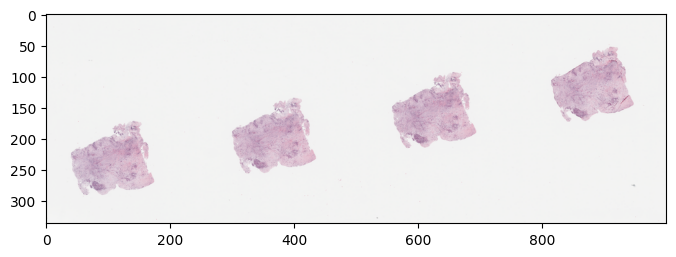

In [75]:
slide_thumb600_np = np.array(slide_thumb600)
plt.figure(figsize=(8,8))
plt.imshow(slide_thumb600)

In [8]:
from skimage.filters import threshold_otsu

In [40]:

def read_wsi(path):
    slide = openslide.OpenSlide(path)
    return slide

def get_thumbnail(slide, level):
    thumbnail = slide.read_region((0, 0), level, slide.level_dimensions[level])
    return np.array(thumbnail)[:, :, :3]  # Drop the alpha channel

def apply_otsu_threshold(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    #np.save("./graythumbnail",gray)
    thresh_val = threshold_otsu(gray)
    binary = gray < thresh_val
    return binary

def extract_patches(image, binary_mask, patch_size=(224, 224), threshold=0.9, max_patches=16):
    patches = []
    h, w = image.shape[:2]
    ph, pw = patch_size
    step = patch_size[0] // 2  # Overlap patches by 50%
    
    for i in range(0, h - ph + 1, step):
        for j in range(0, w - pw + 1, step):
            if len(patches) >= max_patches:
                break
            patch = image[i:i+ph, j:j+pw]
            mask_patch = binary_mask[i:i+ph, j:j+pw]
            print(mask_patch)
            
            if patch.shape[0] == ph and patch.shape[1] == pw:
                tissue_ratio = np.sum(mask_patch) / (ph * pw)
                print(tissue_ratio)
                if tissue_ratio >= threshold:
                    print("i,j: ",i,j)
                    patches.append((patch, mask_patch, i, j))
        
    
    return patches

In order to find the best level of zoom to apply the patches in a way that I obtain patches that cover the largest tissue area possible, I used an iterative approach that finds the best level to apply the patches

In [41]:
def calculate_coverage(slide, patches, level, level0_binary_mask, patch_size = (224,224)):
    level_downsample = slide.level_downsamples[level] / slide.level_downsamples[1]
    
    ph, pw = patch_size
    coverage = 0

    # Get the binary mask for level 0
    #level0_thumbnail = get_thumbnail(slide, level=0)
    #level0_binary_mask = apply_otsu_threshold(level0_thumbnail)

    for _,_,i, j in patches:
        # Map the patch coordinates to level 0
        #print("i: ",i)
        
        i0 = int(i * level_downsample)
        j0 = int(j *   level_downsample)
        ph0 = int(ph * level_downsample)
        pw0 = int(pw * level_downsample)

        # Extract the corresponding area from the level 0 binary mask
        mask_patch_level0 = level0_binary_mask[i0:i0+ph0, j0:j0+pw0]
        coverage += mask_patch_level0.sum()
        print(coverage)
    
    return coverage


def find_best_level(slide, patch_size=(224, 224), threshold=0.9, max_patches=16):
    best_level = 0
    best_patches = []
    best_coverage = 0
    print("Numero di livelli dello slide: ", slide.level_count)
    l0thumbnail = get_thumbnail(slide, 1)
    print("thumbnail livello 0 ottenuta")
    l0binary_mask = apply_otsu_threshold(l0thumbnail)
    #np.save("binary_otsu_mask.npy",l0binary_mask)
    print("maschera otsu livello 0 ottenuta")
    
    for level in range(1,slide.level_count):
        thumbnail = get_thumbnail(slide, level)
        binary_mask = apply_otsu_threshold(thumbnail)
        patches = extract_patches(thumbnail, binary_mask, patch_size, threshold, max_patches)
        
        if len(patches) >= max_patches:
            coverage = calculate_coverage(slide, patches, level, l0binary_mask, patch_size)
            if coverage > best_coverage:
                best_coverage = coverage
                best_level = level
                best_patches = patches
    print("found patches: ",len(best_patches))
    if len(best_patches) < max_patches:
        raise ValueError("Not enough patches with the required tissue content found at any level.")

    return best_level, best_patches

In [42]:
def save_patches_as_numpy(patches, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    for idx, (patch, _, _, _) in enumerate(patches):
        np.save(f"{output_path}/patch_{idx}.npy", patch)

In [43]:
def process_wsi_to_patches(input_path, output_path, patch_size=(224, 224), threshold=0.9, max_patches=16):
    slide = read_wsi(input_path)
    print("wsi image has been read")
    best_level, best_patches = find_best_level(slide, patch_size, threshold, max_patches)
    print("Found the best level of the wsi to apply patches (as well as best patches): ",best_level)
    save_patches_as_numpy(best_patches, output_path)
    print("patches saved to directory")
    print(f"Selected level: {best_level}")

In [44]:
input_path = '../../Dataset5PatientsCPTAC/WSI/C3L-00189-21.svs'
output_path = './'
process_wsi_to_patches(input_path, output_path)

wsi image has been read
Numero di livelli dello slide:  4
thumbnail livello 0 ottenuta
maschera otsu livello 0 ottenuta
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
0.0
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
0.0005181760204081633
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
0.0005181760204081633
[[False False False ... False False Fals

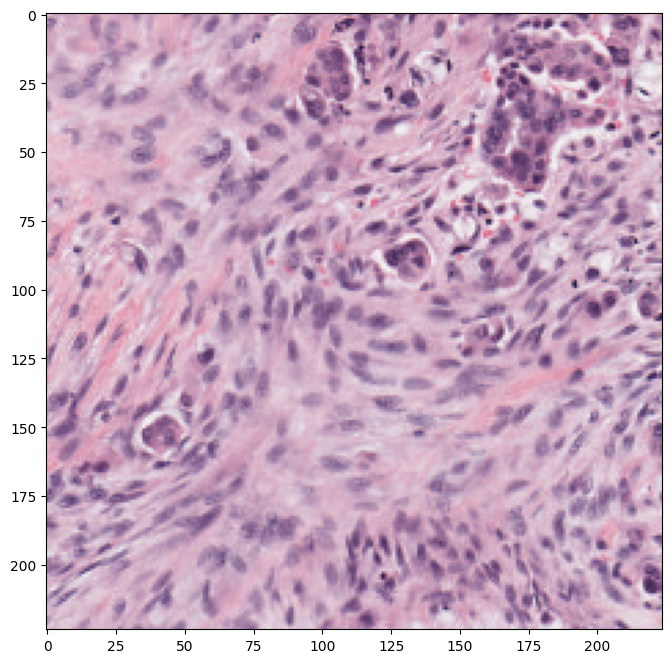

In [46]:
slide_thumb = np.load("patch_1.npy")
plt.figure(figsize=(8,8))
plt.imshow(slide_thumb)

In [123]:
print(slide_thumb == True)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
